
## Data Analytics in Health Care and Connected Care/Health Information Systems
 *Practical Session III: Data Analytics in Healthcare and Connected Care/Health  Information Systems - working with data from wearable devices*

---
---
The aims of this practical session are: (a) to make explore and analyze in details data derived from a consumer wearable device; (b) understand what is ambient intelligence and its main properties. One of the group members must submit the completed notebook of the second practical session in Canvas by March 27th, 23:59:59 (GMT+1).

---


---

*Lecturer/s: Bart Jansen (bjansen@etrovub.be),  Jef Vandemeulebroucke (jefvdmb@etrovub.be), Nikolaos Deligiannis (ndeligia@etrovub.be)*

*Teaching assistant/s: Joris Wuts(jwuts@etrovub.be), Jasabanta Patro (jpatro@etrovub.be), Redona Brahimetaj (rbrahime@etrovub.be)*




In [ ]:
student1_full_name = str(input('Enter your full name: '))
student1_id = int(input('Enter your student ID: '))
student2_full_name = str(input('Enter your full name: '))
student2_id = int(input('Enter your student ID: '))

---
---
#Data Description
---

---


> The data you will be using during this lab session are collected via Apple Watch wearable device as well as labeled sleep scored from gold-standard polysomnography. Data were collected from 31 subjects in total at the University of Michigan from June 2017 to March 2019. Subjects wore an Apple Watch for 7 - 14 days to collect their ambulatory steps. On the last day, they spent the night in the lab for an eight hour sleep opportunity, and acceleration and heart rate from their Apple Watch while they slept were recorded. If any of you have any interest to see sample code on how to access these sensors on the Apple Watch, can find it [here](https://github.com/ojwalch/sleep_accel). The following types of data are provided:

*   **motion (acceleration):**  date (in seconds since PSG start), x acceleration (in g), y acceleration, z acceleration.
*   **heart rate (bpm):** date(in seconds since PSG start), heart rate (bpm)
*   **steps (count):** date (in seconds since PSG start), steps (total in bin from this timestamp to next timestamp)
*   **labeled sleep:** date (in seconds since PSG start), stage (0-5, wake = 0, N1 = 1, N2 = 2, N3 = 3, REM = 5)

For your information, apple watch uses a triaxial MEMS accelerometer that measures acceleration in the x, y, and z directions, in units of g (9.8 m/s2). Heart rate is measured with  photoplethysmography (PPG) (an optical technique that measures blood volume changes) on the dorsal aspect of the wrist. Raw acceleration signal and heart rate data are obtained from the device by creating a “Workout Session” and using functions built-in to the iOS WatchKit and HealthKit frameworks. For more detailed information/description of the dataset, please refer [here](https://academic.oup.com/sleep/article/42/12/zsz180/5549536).


---
---

##Downloading and Preparing the Data


* To use the data, you should click [here](https://drive.google.com/drive/folders/19DAPxpjTlXy3ZEJpO05BiG7O4CxiTjEU), click on the folder named 'cropped' and then click on 'Add shortcut to Drive'. Select the folder you want to add a shortcut to (to avoid having issues with folder paths, we suggest you add the file to 'My Drive' drectory). After doing so, run the two lines of code below.

*  The data we have shared, consists of multiple files ('cleaned_counts', 'cleaned_hr', 'cleaned_motion', 'cleaned_psg') per subject. As a first task, you need to read all these files and create a dataframe: rows -> all the subject IDs; columns -> all the saved values we have for all the types of data provided.


Keywords: [list files in a directory](https://docs.python.org/3/library/os.html#os.listdir), [list subject IDs](https://docs.python.org/3/library/re.html#re.findall), [list unique values fom a list](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import shutil, os, re, pandas as pd, numpy as np, matplotlib.pyplot as plt
shutil.copytree('/content/drive/MyDrive/cropped', '/content/cropped')

FileExistsError: ignored

In [3]:
## -- PART 0 -- ##
#create the dataframe with all subjects ids and their corresponding types of data (the headings should look like below)
file_list = os.listdir(path='cropped')
#using dictionary to store all data from cropped folder
data_frame_base = []
subject_id_dictionary = {}


#adding unique subject ids to dictionary

for i in file_list:
  subject_id = re.findall('[0-9]+',i)[0]
  data_frame_base.append([subject_id,0,0,0,0])
  #subject_id_dictionary[subject_id]=[[],[],[],[]]
#0-counts, 1-hr, 2-motion,3-psg
#print(data_frame_base)
data_frame_base = np.unique(data_frame_base,axis=0).tolist()
#print(data_frame_base)

for data in data_frame_base:
  subject_id = data[0]
  
  files_subject_id = [x for x in file_list if x.startswith(subject_id)]
  for file in files_subject_id:
    data_frame_file = pd.read_csv("cropped/"+file)
    data_list = data_frame_file.values.tolist()
    if 'counts' in file:
        data[3] = data_list
    elif 'hr' in file:
        data[2] = data_list
    elif 'motion' in file:
        data[1] = data_list
    else:
       data[4] = data_list
  # for file in files_subject_id:

data_frame_final = pd.DataFrame(data_frame_base)
data_frame_final.columns=["Subject Id","Motion","Heart Rate","Steps","Sleep Labels"]
print(data_frame_final.head(2))


  
  





  Subject Id  ...                                       Sleep Labels
0    1066528  ...  [[30.000000 0.000000], [60.000000 0.000000], [...
1    1360686  ...  [[30.000000 -1.000000], [60.000000 -1.000000],...

[2 rows x 5 columns]


##Getting some visuals and understandings of the dataset

*   To get an overview of the data distribution, for each of the types of data we have, plot the amount of records we have per subject. Interpret the results. In case the amount of records stored per subject is different, list some potential reasons/opinions why they are not the same. 

*   If you would like to use this dataset for classification tasks, a crucial stepis consists on knowing the records we have per each sleep stage. Show/plot the total amount of records per sleep stage. 

*   Choose one random subject id and plot: 

     --> (a) in one graph all three acceleration axes values per  timestamp;

     --> (b) nr of steps per timestamp; 
    
     --> (c) heart rate  values per timestamp; 
    
     --> (d) sleep stages per timestamp; 
     
  For each of these graphs, interpret the results (focusing more on the abnormal behaviors observed)! 

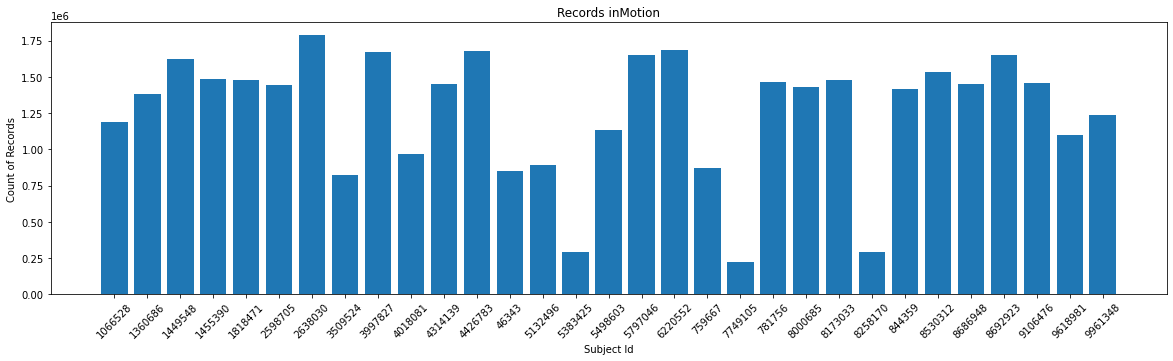

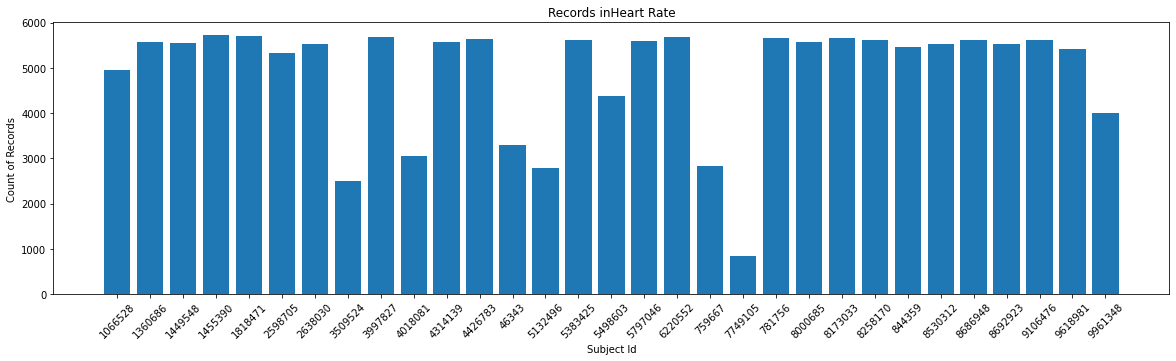

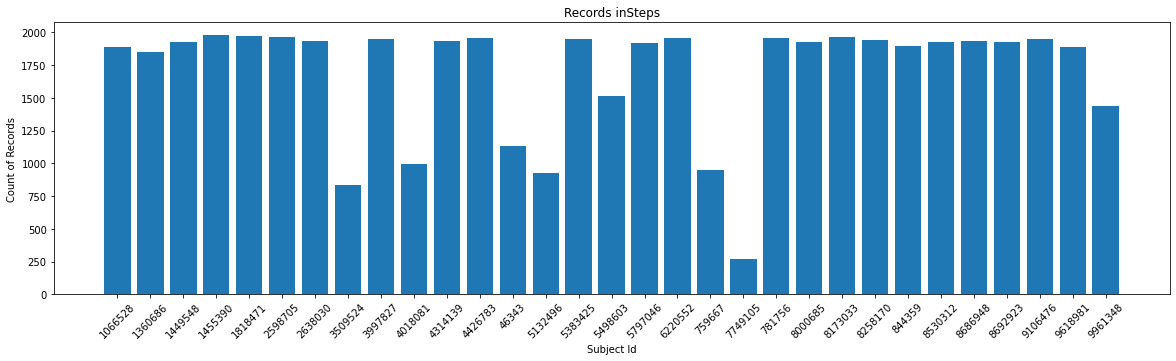

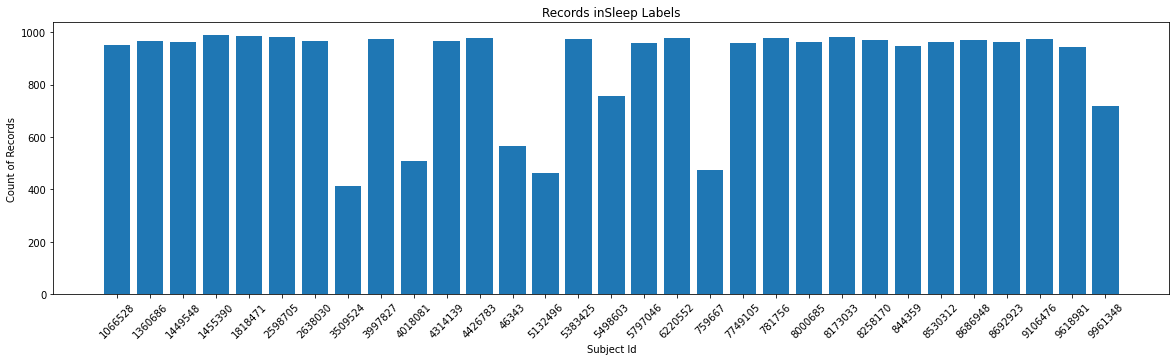

In [4]:
## -- PART I -- ##
#plot amount of records per subject, interpret the results, list potential reasons/opinions why the amount of records recorded per subject are not the same.
def draw_plots(data_xAxis,data_yAxis,category,title="Records in"):
  plt.figure(figsize=(20,5))
  plt.bar(data_xAxis, data_yAxis)
  plt.title(title+category)
  plt.xlabel("Subject Id")
  plt.ylabel("Count of Records")
  plt.xticks(rotation=45)
  plt.show()

data_frame_final["count_of_records_motion"]=data_frame_final.apply(lambda row: len(row["Motion"]),axis=1)
draw_plots(data_frame_final["Subject Id"],data_frame_final["count_of_records_motion"],"Motion")

data_frame_final["count_of_records_hr"]=data_frame_final.apply(lambda row: len(row["Heart Rate"]),axis=1)
draw_plots(data_frame_final["Subject Id"],data_frame_final["count_of_records_hr"],"Heart Rate")

data_frame_final["count_of_records_steps"]=data_frame_final.apply(lambda row: len(row["Steps"]),axis=1)
draw_plots(data_frame_final["Subject Id"],data_frame_final["count_of_records_steps"],"Steps")

data_frame_final["count_of_records_sleep_labels"]=data_frame_final.apply(lambda row: len(row["Sleep Labels"]),axis=1)
draw_plots(data_frame_final["Subject Id"],data_frame_final["count_of_records_sleep_labels"],"Sleep Labels")


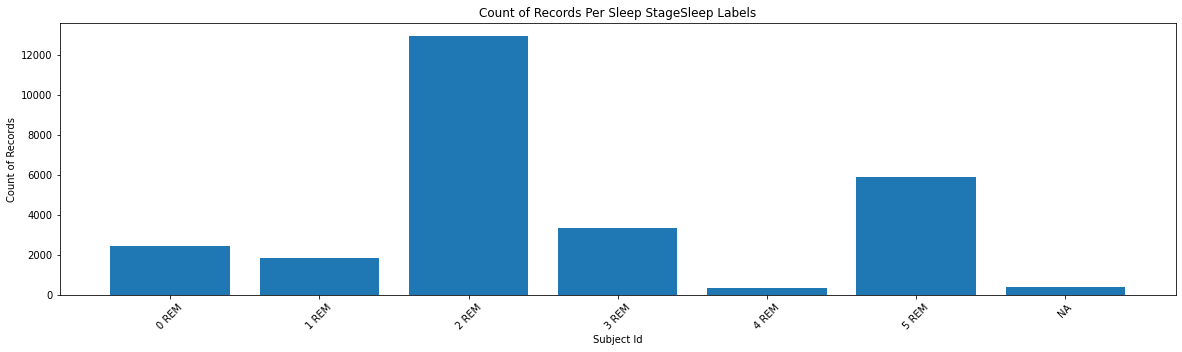

In [5]:
## -- PART II -- ##
#show/plot the total amount of records per sleep stage (for  all subjects together)
def find_sleep_category_count(row_data,category):
  newData=[]
  finalDataCategorized=0
  for data in row_data:
    newData.append([float(i) for i in data[0].split()])
  for data in newData:
    if data[1]==category:
      finalDataCategorized+=1
   
  return finalDataCategorized
    
    
data_frame_final[["Subject Id","Sleep Labels"]]

data_frame_final["0 REM"] = data_frame_final.apply(lambda row:find_sleep_category_count(row["Sleep Labels"],0),axis=1)
data_frame_final["1 REM"] = data_frame_final.apply(lambda row:find_sleep_category_count(row["Sleep Labels"],1),axis=1)
data_frame_final["2 REM"] = data_frame_final.apply(lambda row:find_sleep_category_count(row["Sleep Labels"],2),axis=1)
data_frame_final["3 REM"] = data_frame_final.apply(lambda row:find_sleep_category_count(row["Sleep Labels"],3),axis=1)
data_frame_final["4 REM"] = data_frame_final.apply(lambda row:find_sleep_category_count(row["Sleep Labels"],4),axis=1)
data_frame_final["5 REM"] = data_frame_final.apply(lambda row:find_sleep_category_count(row["Sleep Labels"],5),axis=1)
data_frame_final["NA"] = data_frame_final.apply(lambda row:find_sleep_category_count(row["Sleep Labels"],-1),axis=1)

sum_categorized_sleep_values = [data_frame_final["0 REM"].sum(),data_frame_final["1 REM"].sum(),data_frame_final["2 REM"].sum(),data_frame_final["3 REM"].sum(),data_frame_final["4 REM"].sum(),data_frame_final["5 REM"].sum(),data_frame_final["NA"].sum()]

draw_plots(["0 REM","1 REM","2 REM","3 REM","4 REM","5 REM","NA"],sum_categorized_sleep_values,"Sleep Labels","Count of Records Per Sleep Stage")


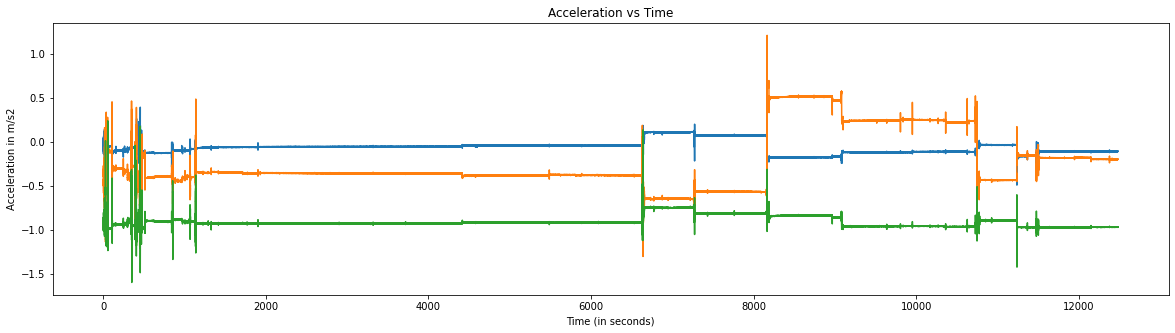

In [6]:
## -- PART III -- ##
#using  the data collected from a  randomly chosen subject id plot: 
from mpl_toolkits.mplot3d import Axes3D  
def data_format(row,index):
  newData = []
  for i in row:
    
    if(type(i[0])==str):
      split_data = [float(x) for x in i[0].split()]
    else:
      split_data = [x for x in i]
    newData.append(split_data[index])
  return newData

data_frame_subject = data_frame_final.loc[data_frame_final["Subject Id"]=='3509524'].copy()

### motion values in all axes in one graph ###
motion_data_time = data_frame_subject.apply(lambda row: data_format(row["Motion"],0),axis=1).tolist()[0]
motion_data_x = data_frame_subject.apply(lambda row: data_format(row["Motion"],1),axis=1).tolist()[0]
motion_data_y = data_frame_subject.apply(lambda row: data_format(row["Motion"],2),axis=1).tolist()[0]
motion_data_z = data_frame_subject.apply(lambda row: data_format(row["Motion"],3),axis=1).tolist()[0]
plt.figure(figsize=(20,5))
plt.plot(motion_data_time, motion_data_x)
plt.plot(motion_data_time, motion_data_y)
plt.plot(motion_data_time, motion_data_z)
plt.title("Acceleration vs Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Acceleration in m/s2")
plt.show()

## Interpret all the results carefully. Focus more on the abnormal behaviors observed.  

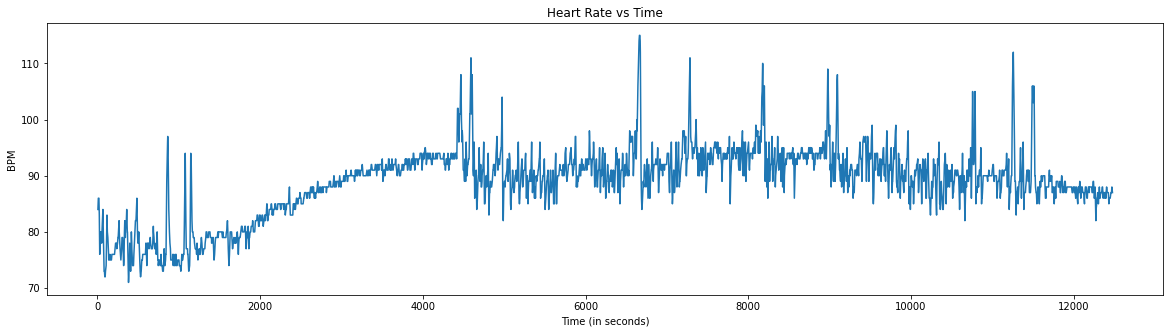

In [7]:
######   heart rate values per timestamp ######
data_frame_subject["heart_rate_data_time"] = data_frame_subject.apply(lambda row: data_format(row["Heart Rate"],0),axis=1)
data_frame_subject["heart_rate_data_value"] = data_frame_subject.apply(lambda row: data_format(row["Heart Rate"],1),axis=1)

plt.figure(figsize=(20,5))
plt.plot(data_frame_subject["heart_rate_data_time"].tolist()[0], data_frame_subject["heart_rate_data_value"].tolist()[0])
plt.title("Heart Rate vs Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("BPM")
plt.show()

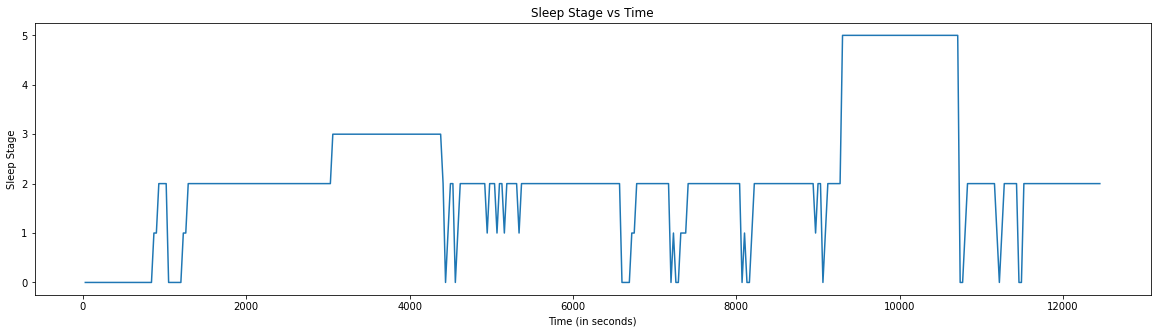

In [8]:
#####    sleep stages per timestamp ######
data_frame_subject["sleep_label_data_time"] = data_frame_subject.apply(lambda row: data_format(row["Sleep Labels"],0),axis=1)
data_frame_subject["sleep_label_data_value"] = data_frame_subject.apply(lambda row: data_format(row["Sleep Labels"],1),axis=1)

plt.figure(figsize=(20,5))
plt.plot(data_frame_subject["sleep_label_data_time"].tolist()[0], data_frame_subject["sleep_label_data_value"].tolist()[0])
plt.title("Sleep Stage vs Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Sleep Stage")
plt.show()

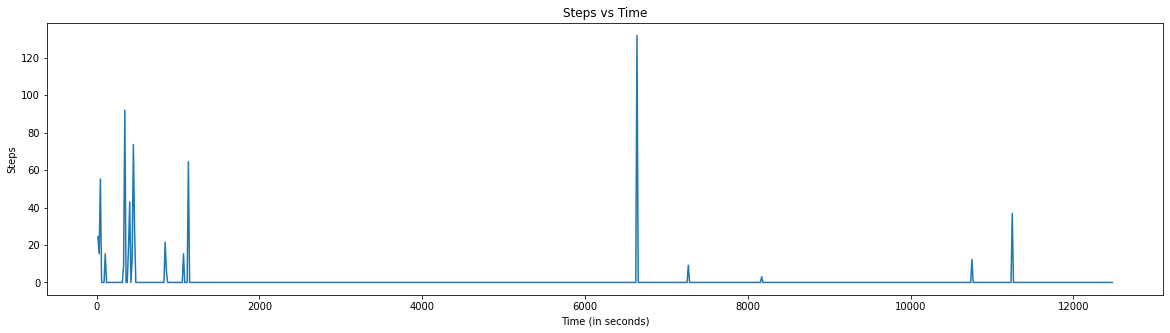

In [9]:
######   nr of steps per timestamp ######
data_frame_subject["steps_data_time"] = data_frame_subject.apply(lambda row: data_format(row["Steps"],0),axis=1)
data_frame_subject["steps_data_value"] = data_frame_subject.apply(lambda row: data_format(row["Steps"],1),axis=1)

plt.figure(figsize=(20,5))
plt.plot(data_frame_subject["steps_data_time"].tolist()[0], data_frame_subject["steps_data_value"].tolist()[0])
plt.title("Steps vs Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Steps")
plt.show()


Heart Rate of the subject is increasing during 2000-4000 seconds. But the steps graph shows that there is no movement during that time. Also from the sleep graph, during that time the patient was asleep

One thing that is consistent throughout the graphs is that during 9000-10000 the subject is in deep sleep. The steps chart shows 0 steps and the motion of the patient is 0 m/s(^2) according to the accelerometer data



---
---
#Ambient Intelligence in Health Care
---

---



The following paragraph is an excert from [[1]](https://www.researchgate.net/publication/259767867_A_Survey_on_Ambient_Intelligence_in_Health_Care).


“Imagine a day when a small tricoder-like device monitors your health status in a continuous
manner, diagnoses any possible health conditions, has a conversation with you to persuade you to change your lifestyle for maintaining better health, and communicates with your doctor, if needed. The device might even be embedded into your regular clothing fibers in the form of very tiny sensors and it might communicate with other devices around you, including the variety of sensors embedded into your home to monitor your lifestyle. For example, you might be alarmed about the lack of a healthy diet based on the items present in your fridge and based on what you are eating outside regularly. This might seem like science fiction for now, but many respecters in the field of “Ambient Intelligence” expect such scenarios to be part of our daily life in not so far future.”
Based on the following papers ([1](https://www.researchgate.net/publication/259767867_A_Survey_on_Ambient_Intelligence_in_Health_Care), [2](https://link.springer.com/article/10.1007/s11042-015-2745-8), [3](https://www.researchgate.net/publication/312025777_Internet_of_Things_for_Measuring_Human_Activities_in_Ambient_Assisted_Living_and_e-Health)), you should answer the following questions:




1.   What is ambient intelligence and which are its main properties?
2.   What is ambient assisted living?
3.   What is a Body Area Network?
4.   What is the difference between inter-BAN and intra-BAN communication?
5.   Describe five body sensors.
6.   Describe the application of heart monitoring with the use of smartphones
7.   What is the IoT and how does it relate with ambient assisted living?





Write you answers here: 



*   Answer for Question 1: Ambient intelligence is the idea that our world interacts intelligently with the individuals who communicate with it in order to promote their well-being.Some of its characteristics are as follows: Context Aware: It takes advantage of contextual and situational data; 
Individualized: It is customized to meet the needs of each individual;Anticipatory: It will predict an individual's needs without the individual's deliberate mediation;Adaptive:It adjusts to the needs of individuals as they change;Ubiquity:It is ingrained in and incorporated into our daily lives;Transparency: It blends seamlessly into the context of our everyday lives.

*   Answer for Question 2: Individuals with disabilities can maintain a more independent lifestyle using AmI technology, which can provide them with continuous cognitive and physical monitoring as well as real-time assistance if required. These programs are particularly beneficial to senior citizens who are experiencing physical and cognitive deterioration.Other cognitive orthotics tools, in addition to medication management, can be extremely beneficial to people with mental disorders, especially older adults suffering from dementia.This is ambient asssited living.

*   Answer for Question 3: BAN is the abbreviation of Body Area Network.Various sensors are attached to clothing or the body, or even inserted under the skin, in a BAN. By actively monitoring health features, this modern communication approach provides a plethora of new, realistic, and creative applications for improving human health and quality of life.BANs provide a technical infrastructure for remotely streaming sensored data to a medical doctor's site for real-time diagnosis, to a medical database for record keeping, or to corresponding technological equipment that can issue an emergency warning or intelligently handle this information to take appropriate steps and improve the quality of human life.

*   Answer for Question 4: The communication architecture of BANs is divided into three layers: Tier-1 intra-BAN, Tier-2 inter-BAN, and Tier-3 communications outside the BAN.
Intra-BAN communications are radio communications that take place within a radius of around 2 meters of the human body, and can be divided into two categories: (1) communications between body sensors, and (2) communications between body sensors and a portable personal server device.
The term “inter-BAN communications” refers to the ability to communicate between body sensors and one or more access points (APs).  The APs may be used as part of the infrastructure or strategically positioned in a complex setting to deal with emergencies.It is used to link BANs to a variety of networks that are commonly used in everyday life, such as the Internet and cellular networks. Infrastructure-based architecture and ad hoc-based architecture are the two paradigms of inter-BAN communications that we distinguish.

*   Answer for Question 5:
1) Accelerometer/Gyroscope: In the area of health care, accelerometers are used to detect body postures .
2) Blood glucose: The amount of glucose circulating in the blood, also known as blood sugar, is referred to as blood glucose.Glucometer is used to analyze the blood sample and gives a numerical glucose reading. Recently, non- invasive glucose monitoring is available through infrared technology and optical sensing.
3) Blood pressure: The blood pressure monitor is a non-invasive sensor that uses oscillometric technology to calculate systolic and diastolic human blood pressure.
4) CO2 gas sensor: This sensor monitors gaseous carbon dioxide levels in order to track CO2 levels and oxygen concentration during human respiration.
5) Pulse Oximetry: This sensor uses a non-invasive probe to test oxygen saturation. A sensor is attached to the person's finger, earlobe, or toe with a tiny film. A light signal is emitted by the sensor and passes through the skin.The calculation is expressed as a ratio of oxygenated hemoglobin to total hemoglobin in arterial blood, based on the light absorption of oxygenated hemoglobin and total hemoglobin.

*   Answer for Question 6:The theory behind mobile heartrate tracking is that skin color changes in response to heart rate. A change in blood flow within the fingertip causes these changes, which is clearly related to heart rate.By Placing the finger over the phone's flashlight and the sensor helps the camera to measure skin color reasonably accurately and convert it to a heart rate in beats per minute. The flash and camera will have to be within a fingertip's reach for this to work.

*   Answer for Question 7: The internet of things is a relatively new concept that are networks formed by ordinary objects with specific serial numbers which can be used to connect or comunicate with one another.Sensors that allow ambient assisted living can be built with the same technologies that allows the Internet of Things 

